In [1]:
!pip install yfinance pandas numpy matplotlib seaborn statsmodels scikit-learn



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
      --------------------------------------- 0.0/3.0 MB 2.0 MB/s eta 0:00:02
      --------------------------------------- 0.0/3.0 MB 2.0 MB/s eta 0:00:02
      --------------------------------------- 0.0/3.0 MB 2.0 MB/s eta 0:00:02
      --------------------------------------- 0.0/3.0 MB 2.0 MB/s eta 0:00:02
      --------------------------------------- 0.0/3.0 MB 2.0 MB/s eta 0:00:02
      --------------------------------------- 0.0/3.0 MB 2.0 MB/s eta 0:00:02
     - -------------------------------------- 0.1/3.0 MB 343.4 kB/s eta 0:00:09
     - -------------------------------------- 0.1/3.0 MB 343.4 kB/s eta 0:00:09
     - -------------------------------------- 0.1/3.0 MB 343.4 kB/s eta 0:00:09
     -- ------------------------------------- 0.2/3.0 MB 328.1 kB/s eta 0:00:09
     -- ------------------------------------- 0.2/3.0 MB 357.9 kB/s eta 0:00:08
     --- ------------------------------------ 0.2/3.0 MB 382

In [40]:
# Importing necessary libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [41]:
# Load historical stock price data using yfinance
def get_stock_data(ticker, start, end):
    stock_data = yf.download(ticker, start=start, end=end)
    return stock_data

The dataset is being fetched via the Yahoo Finance API using the yfinance library in Python.

These are the dataset typically includes.

1.  Date: The time component, representing the trading days.
2.  Open: The price of the stock at the beginning of the trading day.
3.  High: The highest price of the stock during the trading day.
4.  Low: The lowest price of the stock during the trading day.
5.  Close: The price of the stock at the end of the trading day.
6.  Adj Close: The adjusted closing price, which accounts for events like dividends, stock splits, etc.
7.  Volume: The number of shares traded during the day.

In [42]:
# Load data for Apple stock from 2010 to 2023
ticker = 'AAPL'
start_date = '2010-01-01'
end_date = '2023-01-01'

stock_data = get_stock_data(ticker, start_date, end_date)
stock_data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.454507,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.465664,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.362819,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.351057,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.393280,447610800


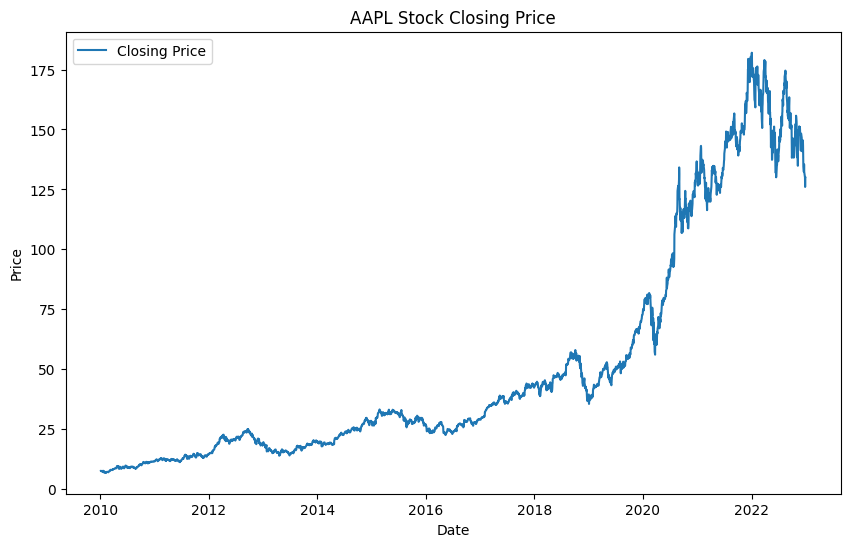

In [43]:
# Exploratory Data Analysis (EDA)
# Plotting the stock's closing price over time
plt.figure(figsize=(10, 6))
plt.plot(stock_data['Close'], label='Closing Price')
plt.title(f'{ticker} Stock Closing Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


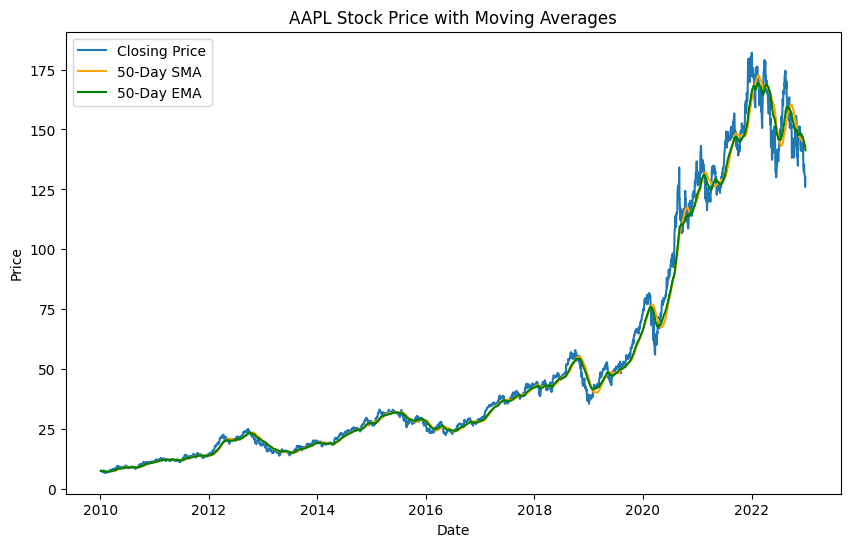

In [44]:
# Moving Average Calculation
# Simple Moving Average (SMA) and Exponential Moving Average (EMA)
stock_data['SMA_50'] = stock_data['Close'].rolling(window=50).mean()
stock_data['EMA_50'] = stock_data['Close'].ewm(span=50, adjust=False).mean()

plt.figure(figsize=(10, 6))
plt.plot(stock_data['Close'], label='Closing Price')
plt.plot(stock_data['SMA_50'], label='50-Day SMA', color='orange')
plt.plot(stock_data['EMA_50'], label='50-Day EMA', color='green')
plt.title(f'{ticker} Stock Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

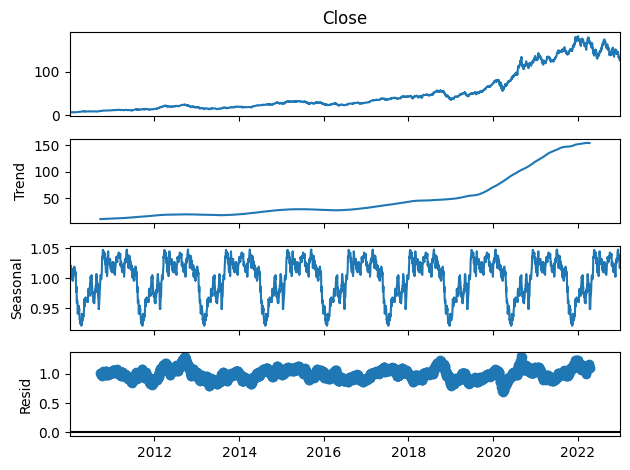

In [45]:
# Decompose the time series
decomposition = seasonal_decompose(stock_data['Close'], model='multiplicative', period=365)
decomposition.plot()
plt.show()

<Figure size 1000x600 with 0 Axes>

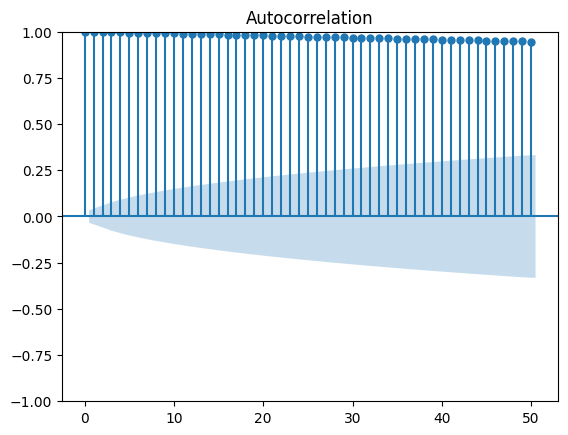

<Figure size 1000x600 with 0 Axes>

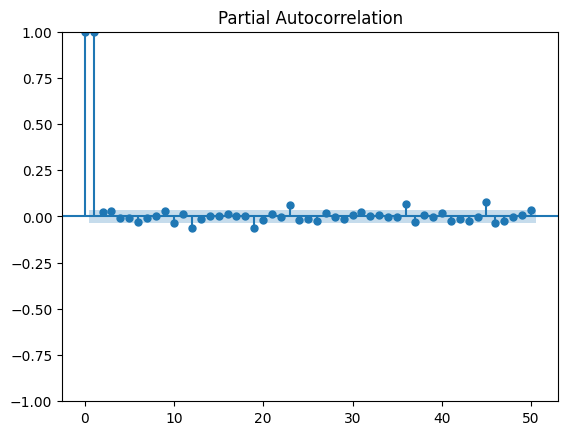

In [46]:
# Autocorrelation Analysis
# Autocorrelation and Partial Autocorrelation Plots
plt.figure(figsize=(10, 6))
plot_acf(stock_data['Close'].dropna(), lags=50)
plt.show()

plt.figure(figsize=(10, 6))
plot_pacf(stock_data['Close'].dropna(), lags=50)
plt.show()

In [47]:
# Build ARIMA model
# Differencing the data to make it stationary (if necessary)
stock_data['Close_diff'] = stock_data['Close'].diff().dropna()

In [48]:
# Splitting into training and test sets
train_data = stock_data['Close'][:int(0.8 * len(stock_data))]
test_data = stock_data['Close'][int(0.8 * len(stock_data)):]


In [49]:
# Build ARIMA model (p, d, q)
arima_model = ARIMA(train_data, order=(5, 1, 2))  # Example values for p, d, q
arima_result = arima_model.fit()

# Forecasting
forecast = arima_result.forecast(steps=len(test_data))

C:\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Python\

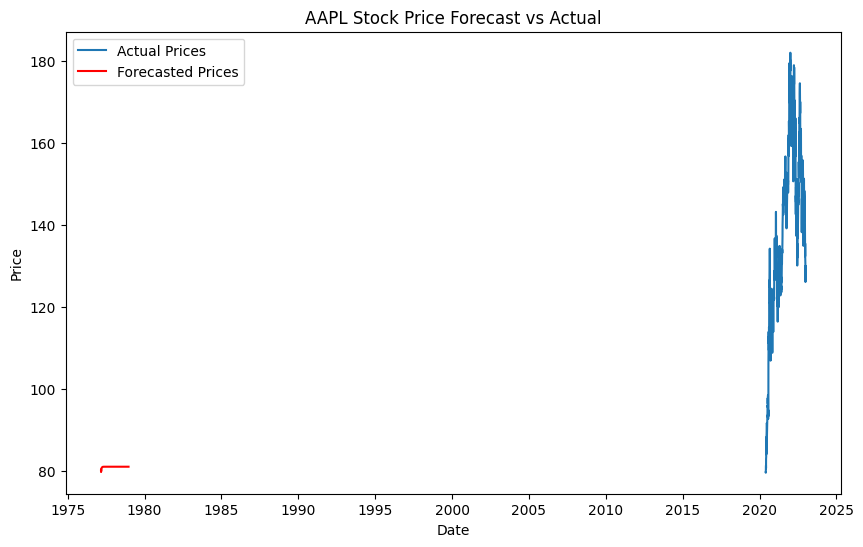

In [50]:
# Evaluate the model
# Plotting the actual vs forecast
plt.figure(figsize=(10, 6))
plt.plot(test_data, label='Actual Prices')
plt.plot(forecast, label='Forecasted Prices', color='red')
plt.title(f'{ticker} Stock Price Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [51]:
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test_data, forecast))
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 62.23308966965359
